In [12]:
# matplotlib 한글 깨짐방지
# 아래 코드 실행후 '런타임 다시시작' 후 모듈 불러오기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [13]:
pip install --upgrade --force-reinstall numba

  Using cached numba-0.61.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.44.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numba-0.61.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.8 MB)
Using cached llvmlite-0.44.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (42.4 MB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.44.0
    Uninstalling llvmlite-0.44.0:
      Successfully uninstalled llvmlite-0.44.0
  Attempting uninstall: numba
    Found existing installation: numba 0.61.2
    Uninsta

In [ ]:
pip install tslearn

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

plt.rc('font', family='NanumBarunGothic') # matplotlib 한글 깨짐 방지

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/날씨빅콘/train_heat.csv')

# 첫번째 열 제거
data = data.drop(columns=["Unnamed: 0"])

# 컬럼명에서 train_heat. 제거
data.columns = data.columns.str.replace("train_heat.", "", regex=False)

# 날짜 데이터를 데이트타임으로 변경
data['tm'] = pd.to_datetime(data['tm'].astype(str), format="%Y%m%d%H")

data['year'] = data['tm'].dt.year
data['hour'] = data['tm'].dt.hour
data['month'] = data['tm'].dt.month
data['day'] = data['tm'].dt.day

data.head()

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm    si  \
0 2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2 -99.0   
1 2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9 -99.0   
2 2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2 -99.0   
3 2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0 -99.0   
4 2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5 -99.0   

   ta_chi  heat_demand  year  hour  month  day  
0    -8.2          281  2021     1      1    1  
1    -8.6          262  2021     2      1    1  
2    -8.8          266  2021     3      1    1  
3    -8.9          285  2021     4      1    1  
4    -9.2          283  2021     5      1    1

In [6]:
# -99는 결측치로 간주
# 이때 풍향(wd)는 -9.9도 결측치로 간주
data['ta'] = data['ta'].replace(-99, pd.NA)
data['wd'] = data['wd'].replace([-99, -9.9], pd.NA)
data['ws'] = data['ws'].replace(-99, pd.NA)
data['rn_day'] = data['rn_day'].replace(-99, pd.NA)
data['rn_hr1'] = data['rn_hr1'].replace(-99, pd.NA)
data['hm'] = data['hm'].replace(-99, pd.NA)
data['si'] = data['si'].replace(-99, pd.NA)
data['ta_chi'] = data['ta_chi'].replace(-99, pd.NA)

In [7]:
data['date'] = pd.to_datetime(data['tm']).dt.date

In [8]:
# 수치형으로 변환
cols = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si', 'ta_chi']

for col in cols:
    data[col] = pd.to_numeric(data[col], errors='raise')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tm           499301 non-null  datetime64[ns]
 1   branch_id    499301 non-null  object        
 2   ta           486304 non-null  float64       
 3   wd           478897 non-null  float64       
 4   ws           480486 non-null  float64       
 5   rn_day       480675 non-null  float64       
 6   rn_hr1       480147 non-null  float64       
 7   hm           459584 non-null  float64       
 8   si           266379 non-null  float64       
 9   ta_chi       499281 non-null  float64       
 10  heat_demand  499301 non-null  int64         
 11  year         499301 non-null  int32         
 12  hour         499301 non-null  int32         
 13  month        499301 non-null  int32         
 14  day          499301 non-null  int32         
 15  date         499301 non-null  obje

In [10]:
# 결측치 비율
data.isnull().mean() *100

tm              0.000000
branch_id       0.000000
ta              2.603039
wd              4.086513
ws              3.768268
rn_day          3.730415
rn_hr1          3.836163
hm              7.954520
si             46.649616
ta_chi          0.004006
heat_demand     0.000000
year            0.000000
hour            0.000000
month           0.000000
day             0.000000
date            0.000000
dtype: float64

* 일단 si를 제외한 나머지 변수들의 결측치는 제거하고 진행

* si는 밤,새벽 시간대 데이터는 0으로 채운 후 나머지는 drop

| 기준 항목                     | 설명               | 추천 보간 방법                                                          |
| ------------------------- | ---------------- | ----------------------------------------------------------------- |
| **① 결측 비율이 매우 낮음 (<1%)**  | 전체 시계열에서 몇 개만 결측 | `선형 보간`, `최근접 값`, `이동 평균`                                         |
| **② 연속 결측 길이가 짧음 (<24시간)** | 결측이 한두 개씩 흩어져 있음 | `선형 보간`, `시계열 기반 보간`                                              |
| **③ 연속 결측 길이가 길음 (≥24시간)** | 3\~12시간 이상 연속 결측 | `이동 평균 + 선형`, `모델 기반(LSTM AE)`                                    |
| **④ 결측 비율이 높음 (≥5\~10%)** | 수천 개 이상 결측       | `LSTM Autoencoder`, `KNN imputer`, `Matrix Factorization` 등 고급 기법 |


## **si 결측치**

In [11]:
data[data['si'].isna()]

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
0      2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2   
1      2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9   
2      2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2   
3      2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0   
4      2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5   
...                    ...       ...   ...    ...  ...     ...     ...   ...   
499296 2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5   
499297 2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1   
499298 2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3   
499299 2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5   
499300 2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9   

        si  ta_chi  heat_demand  year  hour  month  day        date  
0      NaN    -8.2          281  2021     1      1    1  2021-01-01  
1      NaN    -8.6          262  2021     2      1    1  2021-01-01  
2      NaN    -8.8          266  2021     3      1    1  2021-01-01  
3      NaN    -8.9          285  2021     4      1    1  2021-01-01  
4      NaN    -9.2          283  2021     5      1    1  2021-01-01  
...     ..     ...          ...   ...   ...    ...  ...         ...  
499296 NaN     2.8           34  2023    19     12   31  2023-12-31  
499297 NaN     2.7           35  2023    20     12   31  2023-12-31  
499298 NaN     1.4           35  2023    21     12   31  2023-12-31  
499299 NaN     1.3           40  2023    22     12   31  2023-12-31  
499300 NaN     0.6           33  2023    23     12   31  2023-12-31  

[232922 rows x 16 columns]

* 총 232,922개

In [12]:
# si 변수의 결측치가 있는 행에 대해, 월(month)별로 시(hour) 값이 몇 번 나왔는지

# si 결측치 있는 행만 추출
missing_si = data[data['si'].isna()]

# month별 hour value_counts 확인
result = (
    missing_si
    .groupby('month')['hour']
    .value_counts()
    .unstack(fill_value=0)  # 보기 좋게 테이블 형태로
    .sort_index()
)

result

hour     0     1     2     3     4     5     6     7   8   9   ...  14  15  \
month                                                          ...           
1      1718  1736  1736  1736  1736  1736  1736  1736  82  84  ...  91  83   
2      1568  1568  1568  1568  1568  1568  1568  1540  69  61  ...  62  61   
3      1736  1736  1736  1736  1736  1736  1737   225  63  63  ...  64  63   
4      1680  1680  1680  1680  1680  1680   759    61  60  60  ...  60  60   
5      1736  1736  1736  1736  1737  1736    63    62  62  62  ...  62  62   
6      1680  1680  1681  1681  1680  1680    62    62  62  63  ...  63  63   
7      1736  1736  1736  1736  1736  1736    72    62  62  62  ...  62  62   
8      1736  1736  1736  1736  1736  1736   210    74  73  73  ...  69  66   
9      1680  1680  1680  1680  1680  1680  1639    71  71  71  ...  65  64   
10     1736  1736  1736  1736  1736  1736  1736    65  64  65  ...  64  64   
11     1691  1692  1692  1692  1692  1692  1692  1375  70  62  ...  61  62   
12     1767  1767  1767  1767  1767  1767  1767  1767  69  70  ...  69  69   

hour   16  17  18    19    20    21    22    23  
month                                            
1      82  83  83  1735  1736  1736  1736  1736  
2      60  60  60   317  1568  1568  1568  1568  
3      63  63  63    64  1736  1736  1736  1736  
4      60  60  60    60   523  1680  1680  1680  
5      62  63  63    62    62  1736  1736  1736  
6      62  62  62    62    62  1680  1680  1680  
7      62  62  62    62    62  1736  1736  1736  
8      65  65  65    64   112  1736  1736  1736  
9      63  63  64    64  1600  1680  1680  1680  
10     63  63  63  1145  1736  1736  1736  1736  
11     62  61  61  1692  1692  1692  1692  1692  
12     76  76  76  1767  1767  1767  1767  1767  

[12 rows x 24 columns]

* 기준: 대략 1000개가 넘는 결측이 발생한 시간은 일사량 X 시간

* 월별 일사량 관측시간
    * 1월: 8~18시
    * 2월: 8~19시
    * 3월: 7~19시
    * 4월: 6~20시
    * 5월: 6~20시
    * 6월: 6~20시
    * 7월: 6~20시
    * 8월: 6~20시
    * 9월: 7~19시
    * 10월: 7~18시
    * 11월: 8~18시
    * 12월: 8~18시

* 위 시간을 제외한 시간은 0으로 채워넣겠음

In [13]:
# 월별 관측 가능한 시간대 정의 (시작시간 ~ 종료시간 포함)
sun_hours = {
    1: range(8, 19),
    2: range(8, 20),
    3: range(7, 20),
    4: range(6, 21),
    5: range(6, 21),
    6: range(6, 21),
    7: range(6, 21),
    8: range(6, 21),
    9: range(7, 20),
    10: range(7, 19),
    11: range(8, 19),
    12: range(8, 19),
}

# 관측 시간 외에는 결측값을 0으로 채움
def fill_si(row):
    if pd.isna(row['si']):
        valid_hours = sun_hours.get(row['month'], [])
        if row['hour'] not in valid_hours:
            return 0.0  # 관측시간 외 → 0
    return row['si']  # 관측시간 내 → 그대로 유지 (NaN 포함)

# 적용
data['si'] = data.apply(fill_si, axis=1)

In [14]:
# si 결측치 있는 행 다시 추출
missing_si2 = data[data['si'].isna()]

# month별 hour value_counts 확인
result2 = (
    missing_si2
    .groupby('month')['hour']
    .value_counts()
    .unstack(fill_value=0)  # 보기 좋게 테이블 형태로
    .sort_index()
)

result2

hour    6    7   8   9   10  11  12  13  14  15  16  17  18   19   20
month                                                                
1        0    0  82  84  82  88  88  87  91  83  82  83  83    0    0
2        0    0  69  61  61  62  61  61  62  61  60  60  60  317    0
3        0  225  63  63  63  63  63  63  64  63  63  63  63   64    0
4      759   61  60  60  60  60  60  60  60  60  60  60  60   60  523
5       63   62  62  62  62  62  62  62  62  62  62  63  63   62   62
6       62   62  62  63  63  64  64  63  63  63  62  62  62   62   62
7       72   62  62  62  62  62  62  62  62  62  62  62  62   62   62
8      210   74  73  73  74  65  65  69  69  66  65  65  65   64  112
9        0   71  71  71  71  72  72  71  65  64  63  63  64   64    0
10       0   65  64  65  73  74  65  63  64  64  63  63  63    0    0
11       0    0  70  62  62  62  62  61  61  62  62  61  61    0    0
12       0    0  69  70  67  67  68  68  69  69  76  76  76    0    0

* 잘 제거되었땅

In [47]:
len(missing_si2)

12124

* 채운 후 결측치는 12,124개로 232,922개에서 많이 줄어듦!

## **전체 결측치**

In [15]:
# 전체 변수 결측 제거
num_vars = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si', 'ta_chi', 'heat_demand']

data_clean = data.dropna(subset=num_vars)

# 결측치
data_clean.isnull().mean()

tm             0.0
branch_id      0.0
ta             0.0
wd             0.0
ws             0.0
rn_day         0.0
rn_hr1         0.0
hm             0.0
si             0.0
ta_chi         0.0
heat_demand    0.0
year           0.0
hour           0.0
month          0.0
day            0.0
date           0.0
dtype: float64

* 결측치 모두 제거

In [16]:
len(data_clean)

435791

* 499301 -> 435791개로 약 6만개 줄어듦

# **클러스터링**

by혜현쓰

C, E, J : 여름 낮 시간대 에 눈에 띄는 높은 열수요가 존재. 공장, 산업체, 흡수식 냉방기 사용 등이 집중된 지사일 가능성 큼. 특히 Branch C는 9~15시에 열수요가 가장 집중되어 있음 → 산업체/설비 중심?

B, D, K : 여름임에도 불구하고 전반적인 시간대에서 꾸준한 열수요가 존재. 상업시설(예: 병원, 대형마트, 백화점 등)이 포함된 지사일 가능성. 또는 일부 상시 난방/온수 공급이 필요한 지역 포함 가능성 있음.

나머지 : 열수요는 존재하지만, 전반적으로 낮은 편. 일반적인 주거 밀집형 지역일 가능성이 높고, 여름철에는 난방보다는 온수 수요 정도로 해석될 수 있음.

In [17]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [51]:
# 실루엣 점수 시각화 함수

def plot_silhouette_scores(K_range, sil_scores):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 4))
    plt.plot(K_range, sil_scores, marker='o')
    plt.title('Silhouette Score by Cluster Count (DTW)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

# 클러스터별 heat_demand 시계열 함수
def plot_clusterwise_heat_demand(daily_df, cluster_result, optimal_k):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # 데이터 결합
    heat_df = daily_df[['branch_id', 'date', 'heat_demand']]
    heat_df = heat_df.merge(cluster_result, on='branch_id', how='left')

    # 시각화
    sns.set(style='whitegrid')
    plt.figure(figsize=(18, optimal_k * 4))

    for k in range(optimal_k):
        plt.subplot(optimal_k, 1, k + 1)
        subset = heat_df[heat_df['cluster'] == k]
        sns.lineplot(data=subset, x='date', y='heat_demand', hue='branch_id', legend=False, alpha=0.6)
        plt.title(f'Cluster {k}: Heat Demand Trends')
        plt.xlabel('Date')
        plt.ylabel('Heat Demand')

    plt.tight_layout()
    plt.show()

# 전체 지사의 heat_demand 클러스터별 색상 시각화 함수
def plot_all_branches_by_cluster(daily_df, cluster_result):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # 클러스터 정보 병합
    df = daily_df.merge(cluster_result, on='branch_id')

    # 팔레트 설정
    n_clusters = cluster_result['cluster'].nunique()
    palette = sns.color_palette("tab10", n_colors=n_clusters)

    # 시각화
    plt.figure(figsize=(18, 8))
    sns.set(style="whitegrid")

    for branch_id in df['branch_id'].unique():
        branch_data = df[df['branch_id'] == branch_id]
        cluster_label = branch_data['cluster'].iloc[0]
        plt.plot(branch_data['date'], branch_data['heat_demand'],
                 label=f'Branch {branch_id} (C{cluster_label})',
                 color=palette[cluster_label], alpha=0.6)

    plt.title("Heat Demand of All Branches by Cluster", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Heat Demand")
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=8)
    plt.tight_layout()
    plt.show()

### **1) DTW 기반 KMeans + 모든 변수**

In [48]:
# --------------------------
# 1. 수치형 변수 및 데이터 준비
num_vars = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si', 'ta_chi', 'heat_demand']
daily_df = data_clean.groupby(['branch_id', 'date'])[num_vars].mean().reset_index()

# 지사별 시계열 분리
branches = daily_df['branch_id'].unique()
branch_ts = []

for branch in branches:
    branch_df = daily_df[daily_df['branch_id'] == branch].sort_values('date')
    ts = branch_df[num_vars].values
    branch_ts.append(ts)

# 가장 짧은 시계열 길이에 맞춰 자름
min_len = min(len(ts) for ts in branch_ts)
branch_ts_trimmed = np.array([ts[:min_len] for ts in branch_ts])

# --------------------------
# 2. 정규화
scaler = TimeSeriesScalerMeanVariance()
branch_ts_scaled = scaler.fit_transform(branch_ts_trimmed)

# --------------------------
# 3. 최적 클러스터 수 탐색 (Silhouette Score 기준)
sil_scores = []
K_range = range(2, 6)

for k in K_range:
    model = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=10, random_state=42, verbose=False)
    labels_k = model.fit_predict(branch_ts_scaled)
    flattened = branch_ts_scaled.reshape(branch_ts_scaled.shape[0], -1)
    score = silhouette_score(flattened, labels_k)
    sil_scores.append(score)

optimal_k = K_range[np.argmax(sil_scores)]
print(f"✅ 최적 클러스터 수: {optimal_k}")

# --------------------------
# 4. 최종 모델 학습 및 결과 저장
model = TimeSeriesKMeans(n_clusters=optimal_k, metric="dtw", max_iter=10, random_state=42, verbose=True)
labels = model.fit_predict(branch_ts_scaled)

cluster_result = pd.DataFrame({
    'branch_id': branches,
    'cluster': labels
})

print(cluster_result)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ 최적 클러스터 수: 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.4s finished


2293.272 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.4s finished


1394.819 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.4s finished


1370.781 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.4s finished


1370.781 --> 
   branch_id  cluster
0          A        0
1          B        2
2          C        0
3          D        1
4          E        1
5          F        0
6          G        0
7          H        0
8          I        2
9          J        0
10         K        2
11         L        0
12         M        0
13         N        2
14         O        0
15         P        0
16         Q        2
17         R        0
18         S        0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.4s finished


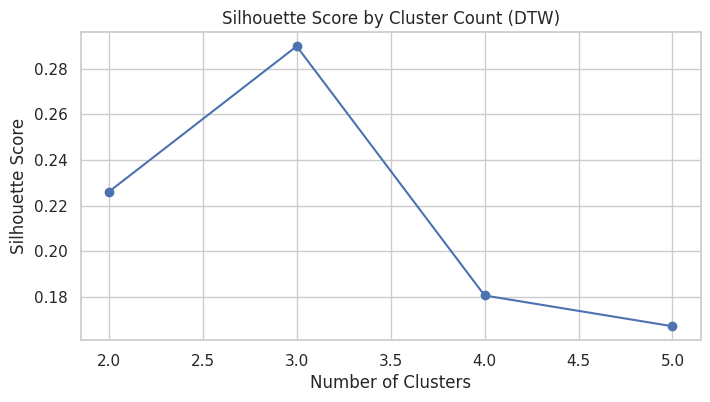

In [52]:
plot_silhouette_scores(K_range, sil_scores)

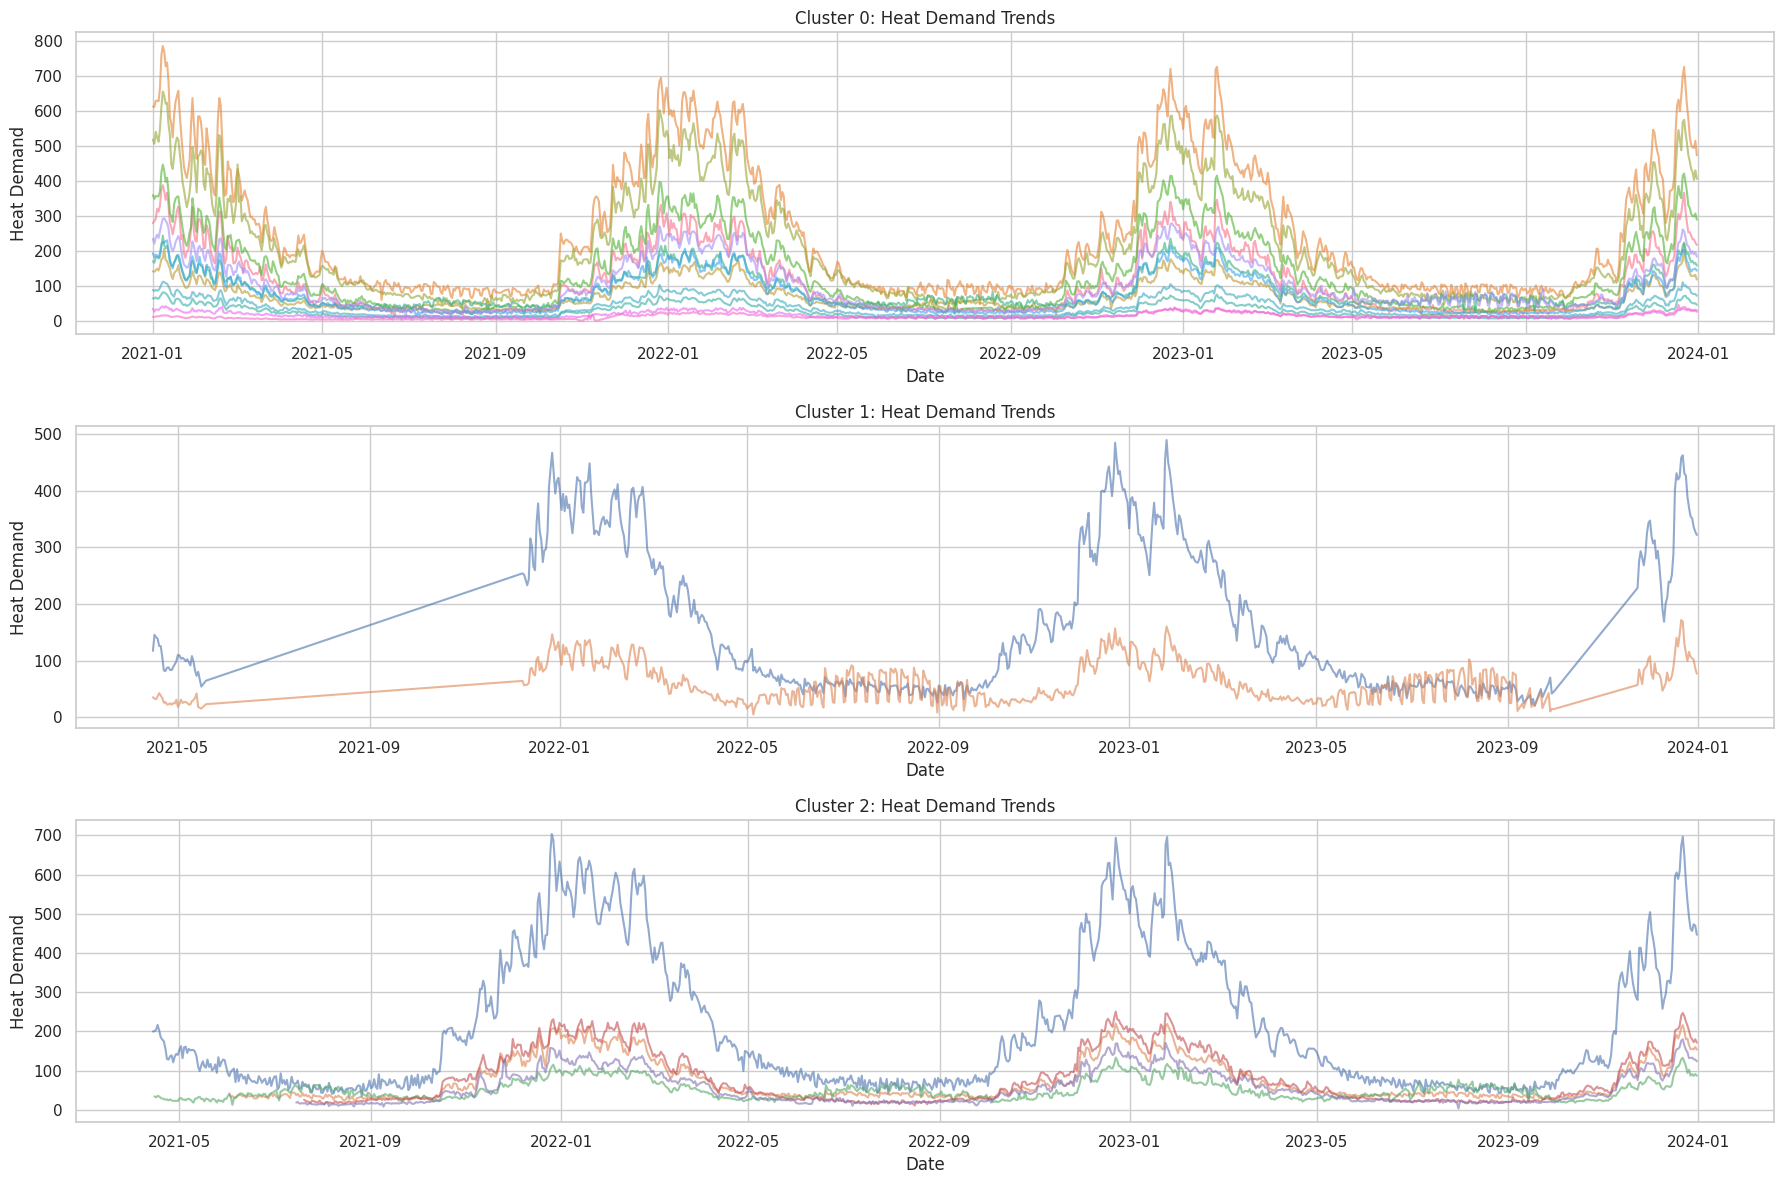

In [53]:
plot_clusterwise_heat_demand(daily_df, cluster_result, optimal_k)

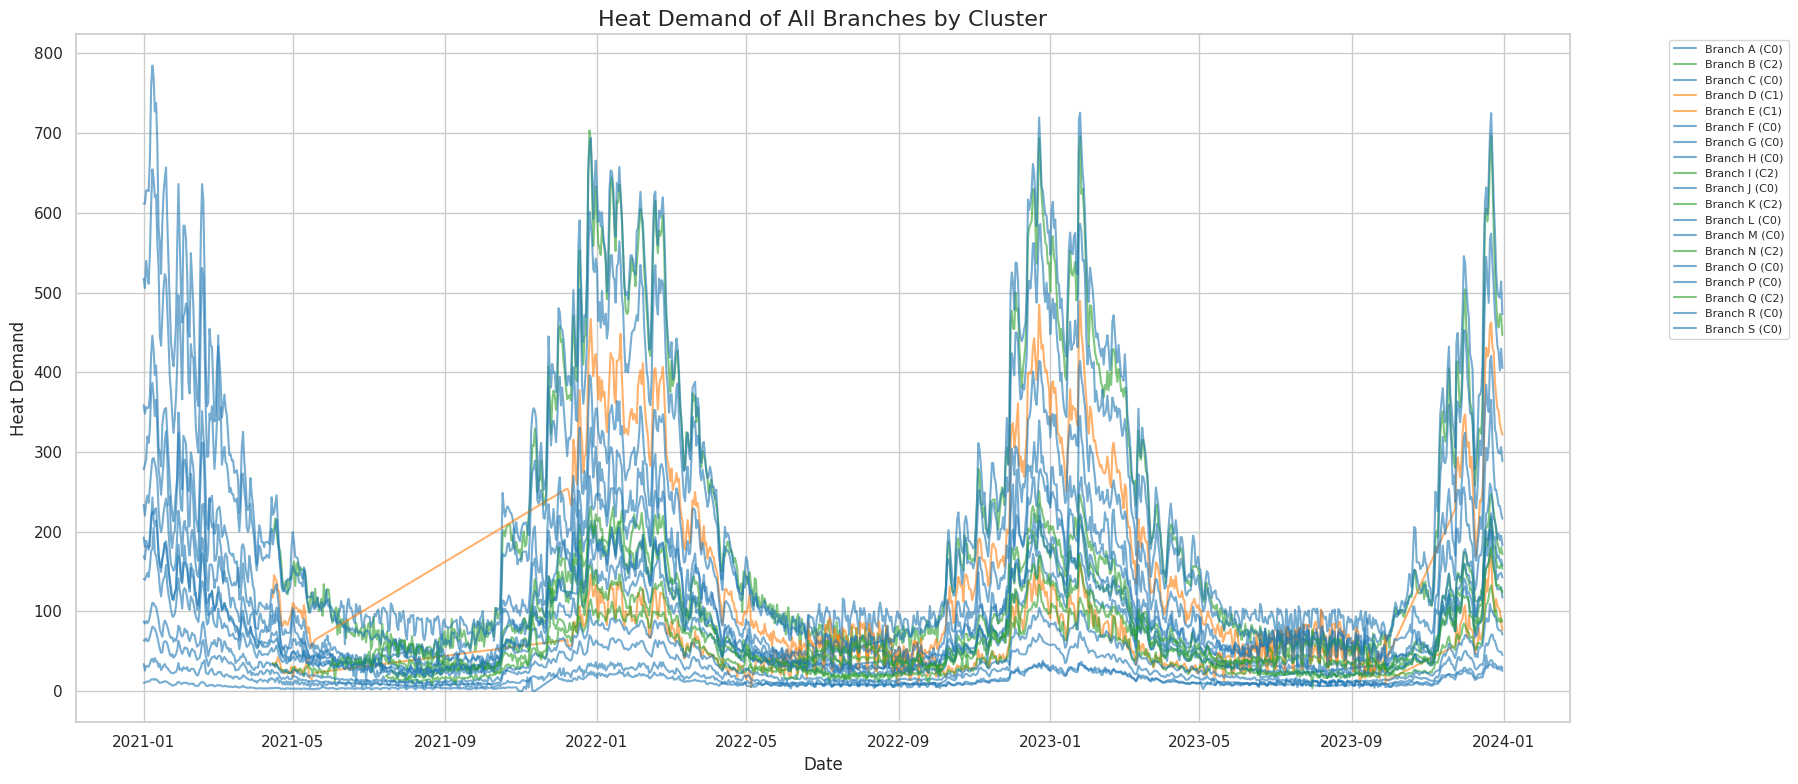

In [54]:
plot_all_branches_by_cluster(daily_df, cluster_result)

### **2) DTW 기반 KMeans + 타겟 변수만**

In [36]:
# --------------------------
# 1. 일 단위로 평균 집계
# --------------------------
target_var = 'heat_demand'
daily_df = data_clean.groupby(['branch_id', 'date'])[[target_var]].mean().reset_index()

# --------------------------
# 2. 지사별 시계열 리스트 생성
# --------------------------
branches = daily_df['branch_id'].unique()
branch_ts = []

for branch in branches:
    branch_df = daily_df[daily_df['branch_id'] == branch].sort_values('date')
    ts = branch_df[[target_var]].values  # 2D로 유지
    branch_ts.append(ts)

# --------------------------
# 3. 시계열 길이 통일
# --------------------------
min_len = min([len(ts) for ts in branch_ts])
branch_ts_trimmed = np.array([ts[:min_len] for ts in branch_ts])

# --------------------------
# 4. 정규화
# --------------------------
scaler = TimeSeriesScalerMeanVariance()
branch_ts_scaled = scaler.fit_transform(branch_ts_trimmed)

# --------------------------
# 5. DTW 기반 KMeans 클러스터링
# --------------------------
n_clusters = 4  # 필요시 조정
model = TimeSeriesKMeans(n_clusters=n_clusters,
                         metric="dtw",
                         verbose=True,
                         max_iter=10,
                         random_state=42)

labels = model.fit_predict(branch_ts_scaled)

# --------------------------
# 6. 결과 저장
# --------------------------
cluster_result = pd.DataFrame({
    'branch_id': branches,
    'cluster': labels
})

print(cluster_result)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.3s finished
[Parallel(n_jobs=1)

18.424 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.4s finished


10.192 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.4s finished


10.192 --> 
   branch_id  cluster
0          A        0
1          B        1
2          C        0
3          D        3
4          E        2
5          F        0
6          G        0
7          H        0
8          I        1
9          J        0
10         K        1
11         L        0
12         M        0
13         N        1
14         O        0
15         P        0
16         Q        1
17         R        0
18         S        0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.4s finished


<ipython-input-37-b2b8e9599e71>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', n_clusters)


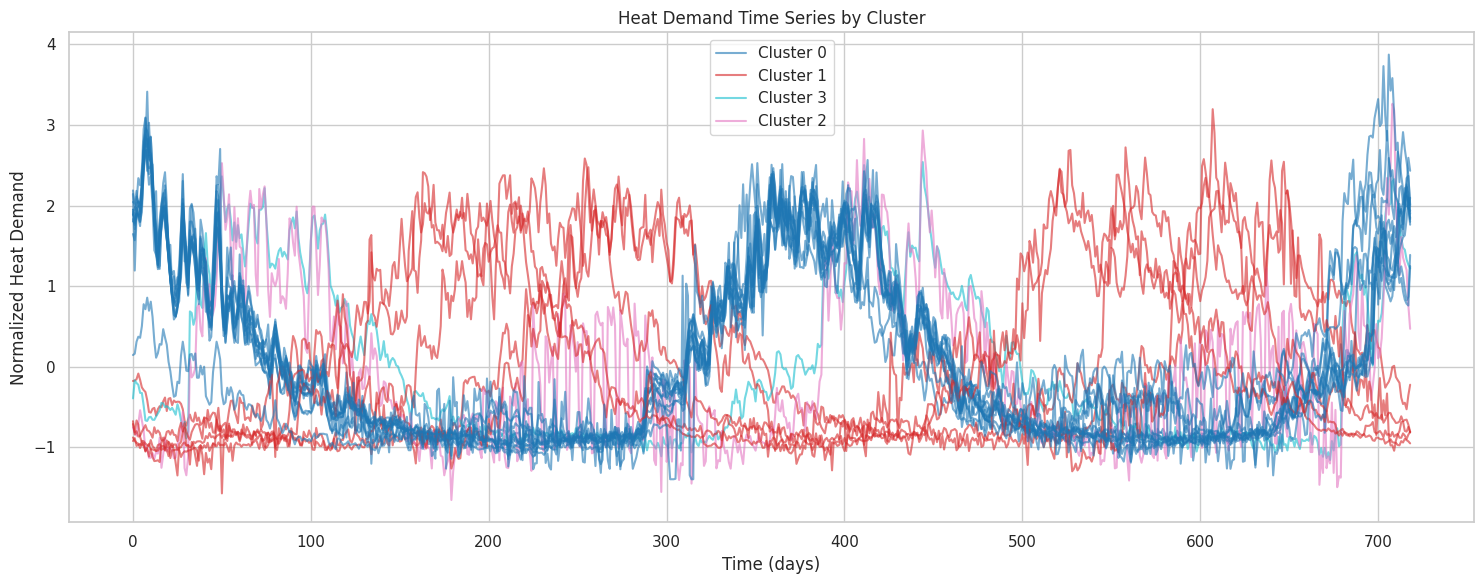

In [37]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# --------------------------
# 1. 클러스터별 색상 설정
# --------------------------
n_clusters = cluster_result['cluster'].nunique()
colors = cm.get_cmap('tab10', n_clusters)

# --------------------------
# 2. 시각화
# --------------------------
plt.figure(figsize=(15, 6))

for i, branch in enumerate(cluster_result['branch_id']):
    cluster = cluster_result.loc[cluster_result['branch_id'] == branch, 'cluster'].values[0]
    ts = branch_ts_scaled[i].squeeze()  # 2D -> 1D
    plt.plot(ts, color=colors(cluster), alpha=0.6, label=f'Cluster {cluster}' if f'Cluster {cluster}' not in plt.gca().get_legend_handles_labels()[1] else None)

plt.title('Heat Demand Time Series by Cluster')
plt.xlabel('Time (days)')
plt.ylabel('Normalized Heat Demand')
plt.legend()
plt.tight_layout()
plt.show()


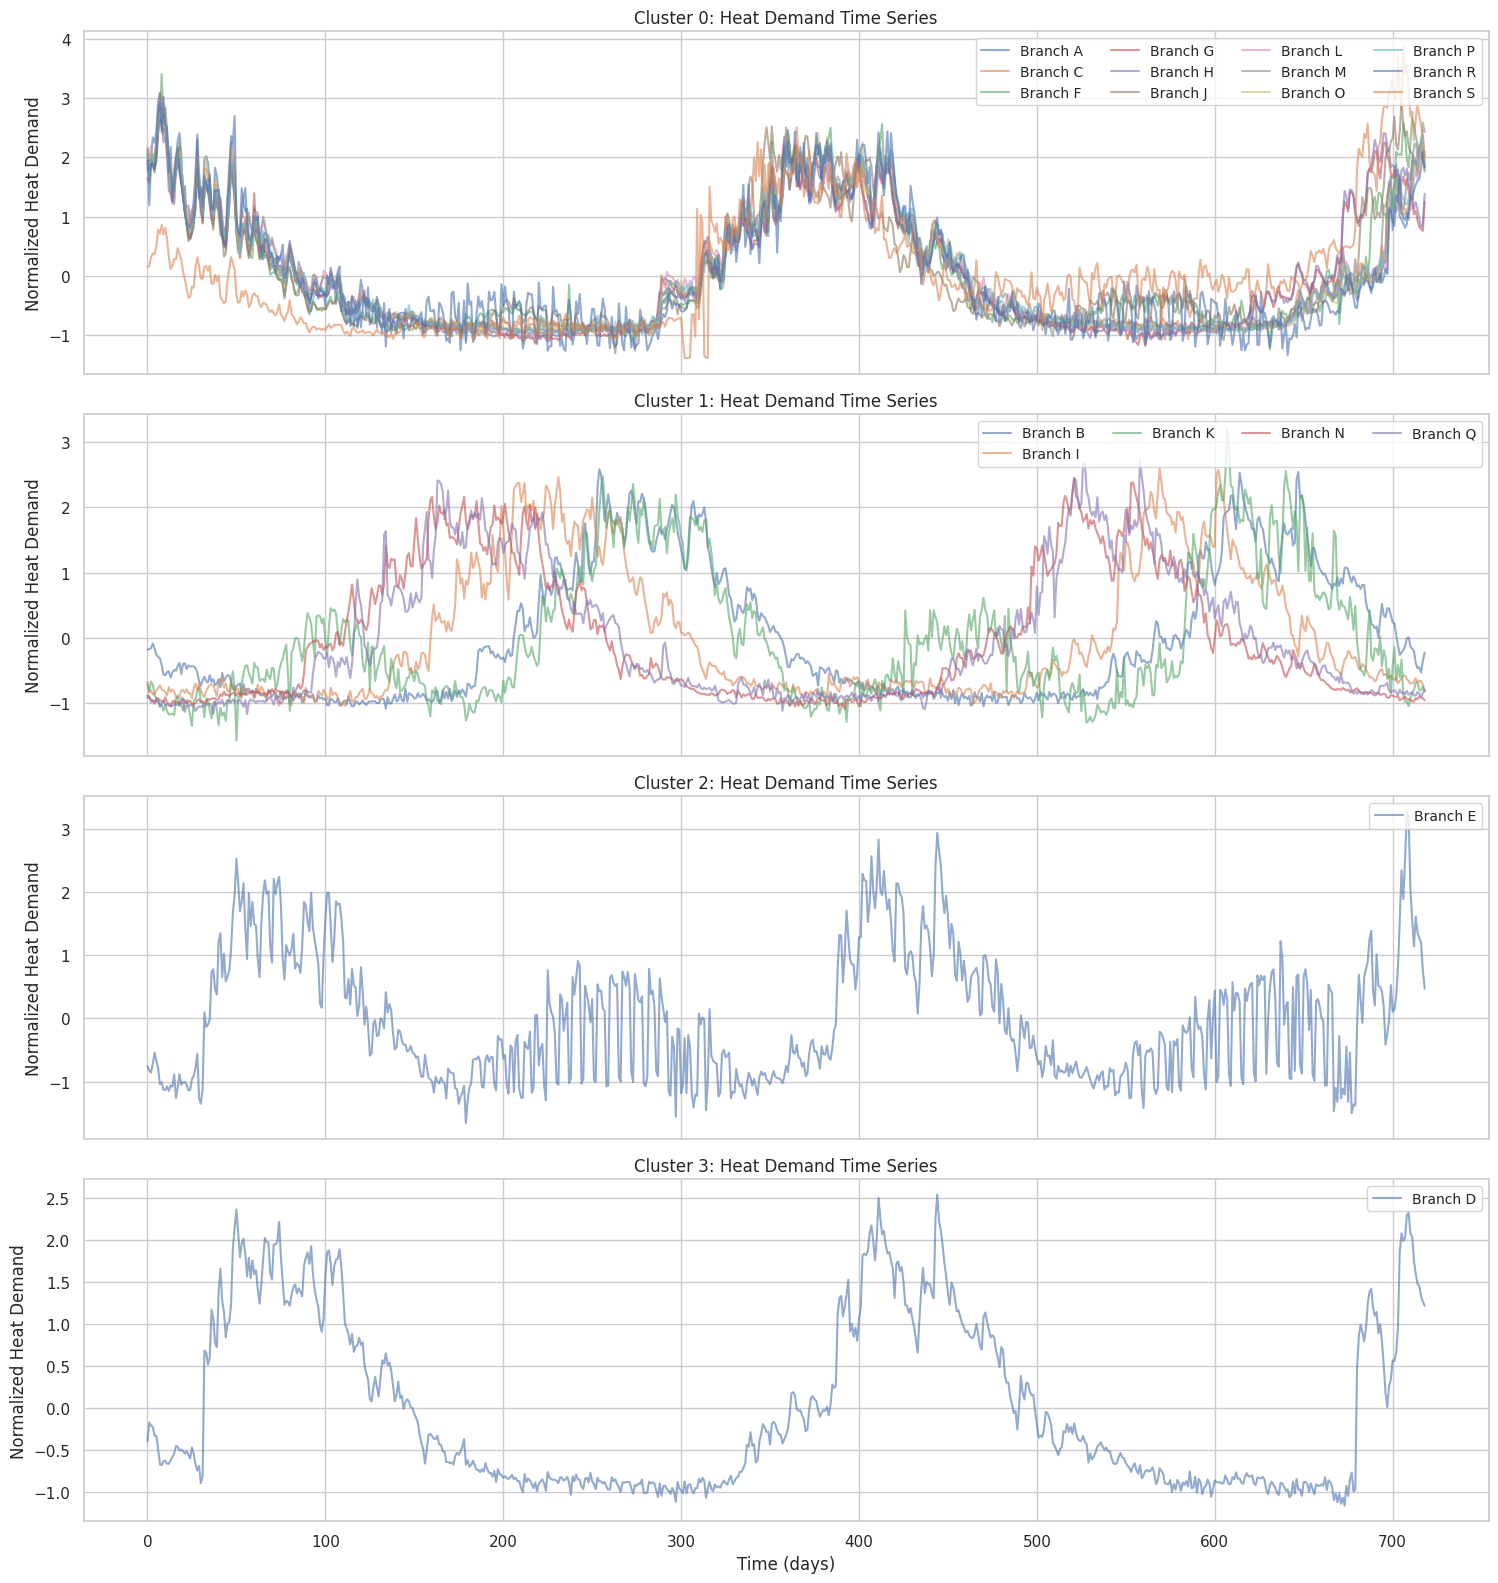

In [38]:
import matplotlib.pyplot as plt

# 클러스터 개수
n_clusters = cluster_result['cluster'].nunique()

# 클러스터별 서브플롯
fig, axes = plt.subplots(n_clusters, 1, figsize=(15, 4 * n_clusters), sharex=True)

for cluster_num in range(n_clusters):
    ax = axes[cluster_num] if n_clusters > 1 else axes  # 클러스터가 1개면 axes는 단일 axis
    branch_ids = cluster_result[cluster_result['cluster'] == cluster_num]['branch_id']

    for branch_id in branch_ids:
        i = list(cluster_result['branch_id']).index(branch_id)
        ts = branch_ts_scaled[i].squeeze()
        ax.plot(ts, alpha=0.6, label=f'Branch {branch_id}')

    ax.set_title(f'Cluster {cluster_num}: Heat Demand Time Series')
    ax.set_ylabel('Normalized Heat Demand')
    ax.legend(loc='upper right', fontsize='small', ncol=4)

plt.xlabel('Time (days)')
plt.tight_layout()
plt.show()


## **3) AutoEncoder + 타겟변수만**

Epoch 0, Loss: 0.1437
Epoch 10, Loss: 0.0624
Epoch 20, Loss: 0.0616
Epoch 30, Loss: 0.0613
Epoch 40, Loss: 0.0613


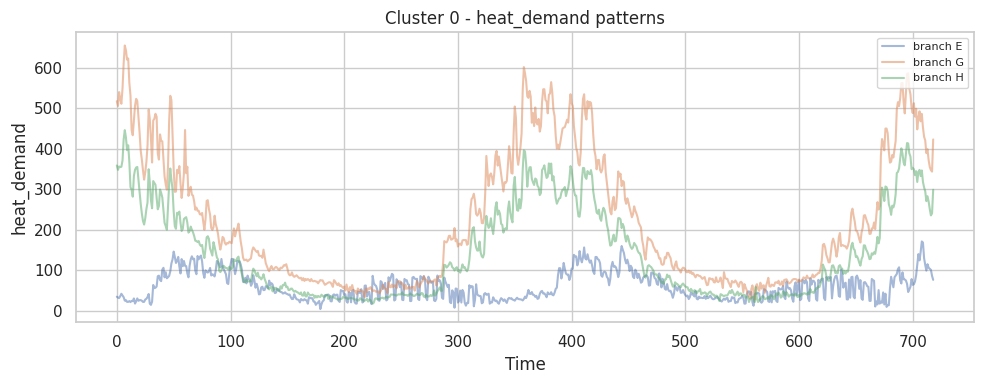

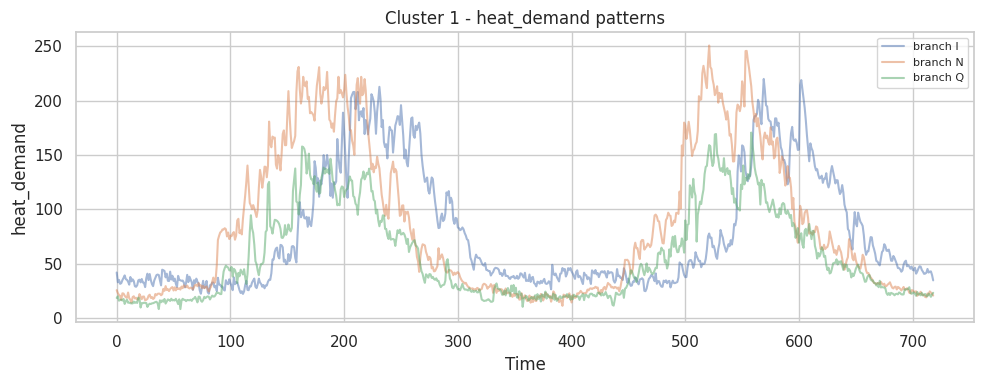

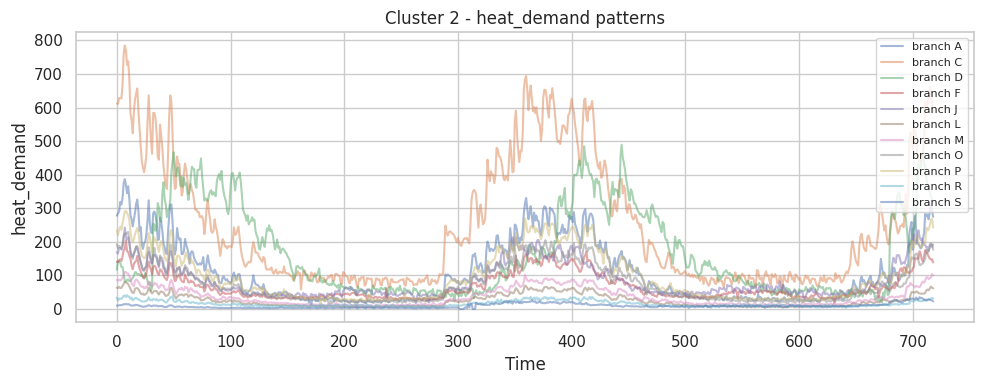

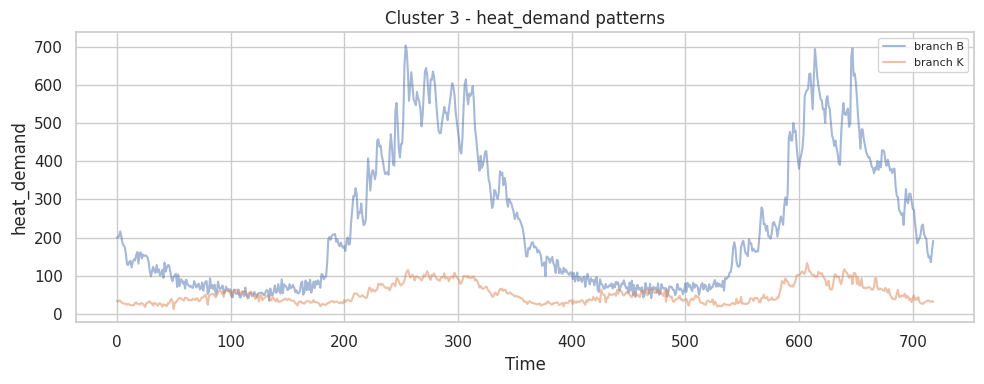

In [41]:
import torch
import torch.nn as nn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# ----- 1. 전처리: 2D → 3D (PyTorch 학습용) -----
X = branch_ts_trimmed.copy()  # shape: (n_branches, time, n_features)
n_branches, seq_len, n_features = X.shape

# 정규화 (지사별)
scalers = [MinMaxScaler() for _ in range(n_branches)]
X_scaled = np.array([scalers[i].fit_transform(X[i]) for i in range(n_branches)])

# PyTorch tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# ----- 2. LSTM Autoencoder 정의 -----
class LSTMAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, bottleneck_dim):
        super(LSTMAutoencoder, self).__init__()
        self.encoder = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.bottleneck = nn.Linear(hidden_dim, bottleneck_dim)
        self.decoder = nn.LSTM(bottleneck_dim, hidden_dim, batch_first=True)
        self.output = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        # Encoding
        _, (hn, _) = self.encoder(x)
        z = self.bottleneck(hn[-1])
        z_seq = z.unsqueeze(1).repeat(1, x.shape[1], 1)  # expand for decoding
        # Decoding
        dec_out, _ = self.decoder(z_seq)
        out = self.output(dec_out)
        return out, z

# ----- 3. 학습 -----
model = LSTMAutoencoder(input_dim=n_features, hidden_dim=64, bottleneck_dim=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

model.train()
for epoch in range(50):
    optimizer.zero_grad()
    recon, _ = model(X_tensor)
    loss = criterion(recon, X_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# ----- 4. Bottleneck 벡터 추출 -----
model.eval()
with torch.no_grad():
    _, z = model(X_tensor)  # shape: (n_branches, bottleneck_dim)
    z_np = z.numpy()

# ----- 5. KMeans 클러스터링 -----
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(z_np)

# ----- 6. 시각화 (예: heat_demand) -----
# heat_demand만 사용한 경우 기준
for cluster_id in range(n_clusters):
    plt.figure(figsize=(10, 4))
    for i in range(n_branches):
        if labels[i] == cluster_id:
            plt.plot(branch_ts_trimmed[i, :, 0],  # 첫 번째 변수만 존재
                     label=f"branch {branches[i]}", alpha=0.5)
    plt.title(f"Cluster {cluster_id} - heat_demand patterns")
    plt.xlabel("Time")
    plt.ylabel("heat_demand")
    plt.legend(loc='upper right', fontsize=8)
    plt.tight_layout()
    plt.show()



## **4) AutoEncoder + 전체변수**

In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# 수치형 변수
num_vars = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si', 'ta_chi', 'heat_demand']

# 일 단위 평균
daily_df = data_clean.groupby(['branch_id', 'date'])[num_vars].mean().reset_index()

# 지사별 시계열 생성
branches = daily_df['branch_id'].unique()
branch_ts = []
for branch in branches:
    branch_df = daily_df[daily_df['branch_id'] == branch].sort_values('date')
    ts = branch_df[num_vars].values
    branch_ts.append(ts)

# 시계열 길이 맞추기
min_len = min([len(ts) for ts in branch_ts])
branch_ts_trimmed = np.array([ts[:min_len] for ts in branch_ts])  # shape: (n_branches, T, n_features)

# 표준화
scaler = TimeSeriesScalerMeanVariance()
branch_ts_scaled = scaler.fit_transform(branch_ts_trimmed)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim

class TimeSeriesAutoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim * min_len, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim * min_len),
            nn.Unflatten(1, (min_len, input_dim))
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out, z


In [44]:
# Tensor 변환
X = torch.tensor(branch_ts_scaled, dtype=torch.float32)
model = TimeSeriesAutoencoder(input_dim=len(num_vars), latent_dim=10)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# 학습
for epoch in range(300):
    optimizer.zero_grad()
    outputs, _ = model(X)
    loss = criterion(outputs, X)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 1.0059
Epoch 50, Loss: 0.3112
Epoch 100, Loss: 0.0988
Epoch 150, Loss: 0.0262
Epoch 200, Loss: 0.0079
Epoch 250, Loss: 0.0026


In [45]:
with torch.no_grad():
    _, latent_vectors = model(X)  # shape: (n_branches, latent_dim)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(latent_vectors.numpy())

# 결과 저장
cluster_result = pd.DataFrame({
    'branch_id': branches,
    'cluster': labels
})
print(cluster_result)


   branch_id  cluster
0          A        2
1          B        1
2          C        2
3          D        2
4          E        2
5          F        2
6          G        0
7          H        0
8          I        3
9          J        0
10         K        3
11         L        1
12         M        1
13         N        3
14         O        2
15         P        2
16         Q        3
17         R        1
18         S        0


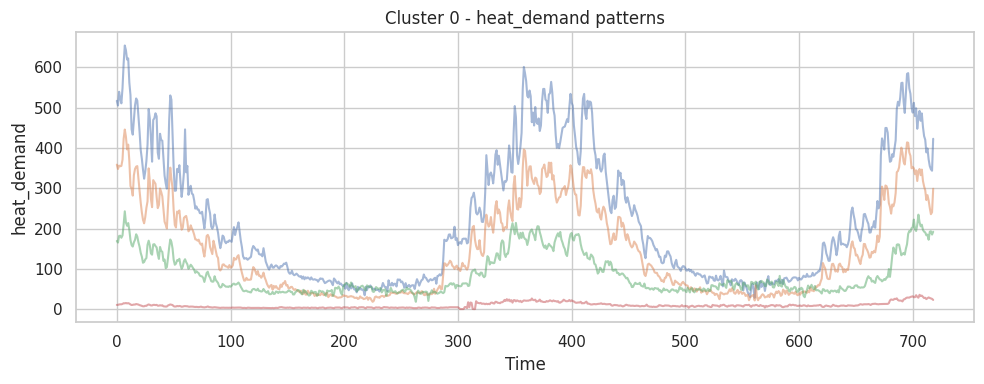

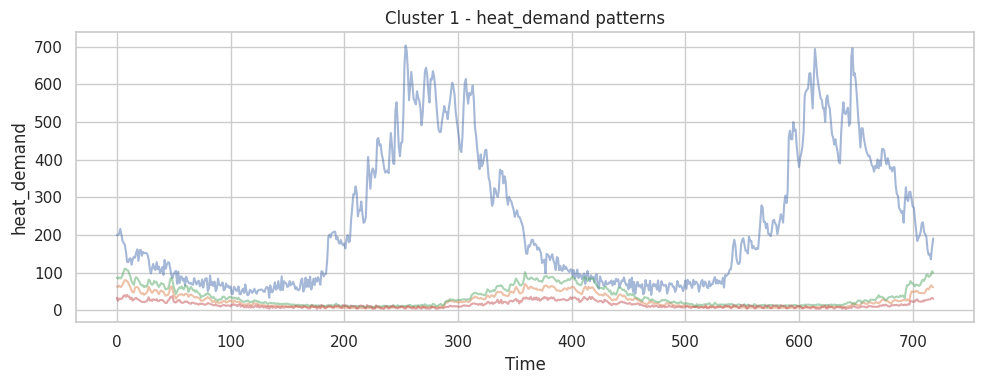

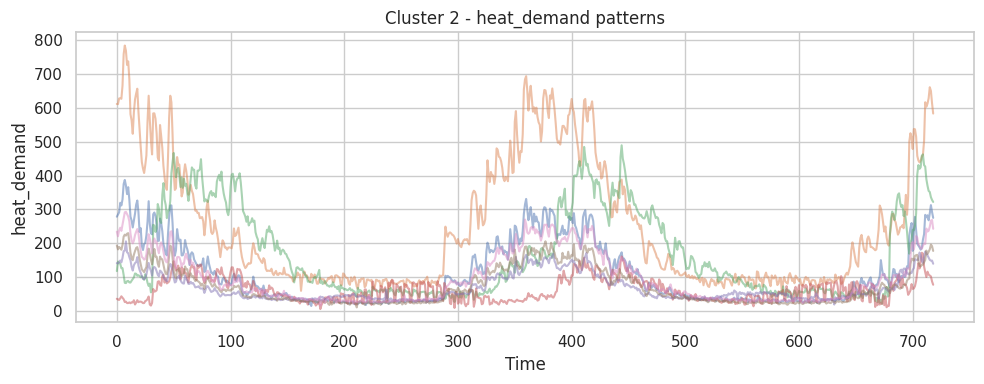

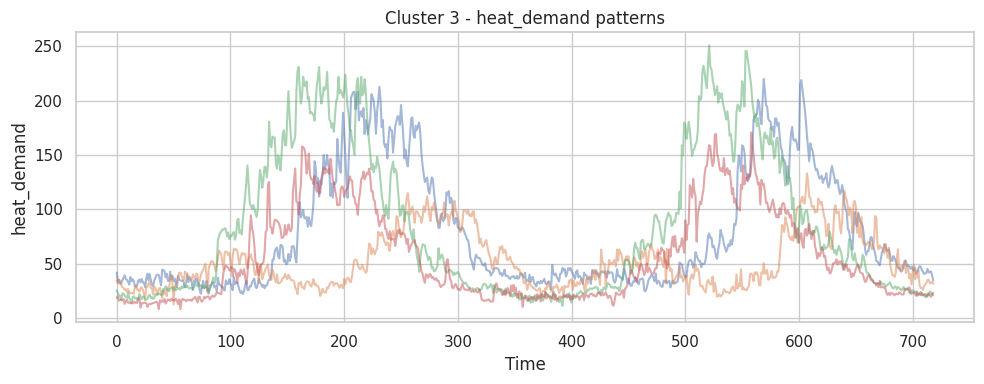

In [46]:
import matplotlib.pyplot as plt

for cluster_id in range(4):
    plt.figure(figsize=(10, 4))
    for i in range(len(branches)):
        if labels[i] == cluster_id:
            plt.plot(branch_ts_trimmed[i, :, num_vars.index('heat_demand')],
                     label=f"branch {branches[i]}", alpha=0.5)
    plt.title(f"Cluster {cluster_id} - heat_demand patterns")
    plt.xlabel("Time")
    plt.ylabel("heat_demand")
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

# latent_vectors: Autoencoder의 임베딩 결과 (numpy array)
# branch_ts_trimmed: 시계열 데이터 (numpy array)
# heat_demand_only: heat_demand만 추출한 시계열 (numpy array)

def evaluate_clustering(data, labels, method_name):
    try:
        sil = silhouette_score(data, labels)
    except:
        sil = None
    try:
        dbi = davies_bouldin_score(data, labels)
    except:
        dbi = None
    try:
        ch = calinski_harabasz_score(data, labels)
    except:
        ch = None
    return {
        "Method": method_name,
        "Silhouette": round(sil, 3) if sil is not None else "N/A",
        "Davies-Bouldin": round(dbi, 3) if dbi is not None else "N/A",
        "Calinski-Harabasz": round(ch, 3) if ch is not None else "N/A"
    }

results = []

# 1. DTW + All Variables → 차원 축소 필요
X1 = branch_ts_trimmed.reshape(branch_ts_trimmed.shape[0], -1)
results.append(evaluate_clustering(X1, labels_dtw_all, "DTW + All Vars"))

# 2. DTW + heat_demand Only
X2 = branch_ts_trimmed[:, :, num_vars.index('heat_demand')]
results.append(evaluate_clustering(X2, labels_dtw_target, "DTW + heat_demand"))

# 3. Autoencoder + All Variables
results.append(evaluate_clustering(latent_all, labels_ae_all, "AE + All Vars"))

# 4. Autoencoder + heat_demand Only
results.append(evaluate_clustering(latent_target, labels_ae_target, "AE + heat_demand"))

# 결과 테이블
df_results = pd.DataFrame(results)
print(df_results)


In [11]:
latent_vectors

NameError: name 'latent_vectors' is not defined